In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import trimesh as tri

sys.path.insert(0,"../")
from utils import shape_stochastics, mesh_processing

## Q-Wiener process on meshes

In [4]:
# First, get the data to work with it
def get_data(file):
    mesh = o3d.io.read_triangle_mesh(file)
    V, F, Rho = mesh_processing.getDataFromMesh(mesh)
    return(V,F,Rho)

V,F,Rho = get_data("../data/test_data/labrador_preprocessed.ply")

mesh = tri.Trimesh(V,F)
#new_mesh_V, new_mesh_F = mesh_processing.decimate_mesh(V,F,target = 3000) # decimate mesh to speed up computation
#new_mesh = tri.Trimesh(vertices = new_mesh_V, faces = new_mesh_F)
new_mesh, new_mesh_V, new_mesh_F = mesh, mesh.vertices, mesh.faces

In [5]:
# Normalize the data with respect to the unit sphere used as reference to apply the noise
new_mesh_V[:,0] = (new_mesh_V[:,0] - new_mesh_V[:,0].mean()) / new_mesh_V[:,2].max(axis=0)
new_mesh_V[:,1] = (new_mesh_V[:,1] - new_mesh_V[:,1].mean()) / new_mesh_V[:,2].max(axis=0)
new_mesh_V[:,2] = (new_mesh_V[:,2] - new_mesh_V[:,2].mean()) / new_mesh_V[:,2].max(axis=0)

new_mesh = tri.Trimesh(vertices = new_mesh_V, faces = new_mesh_F)

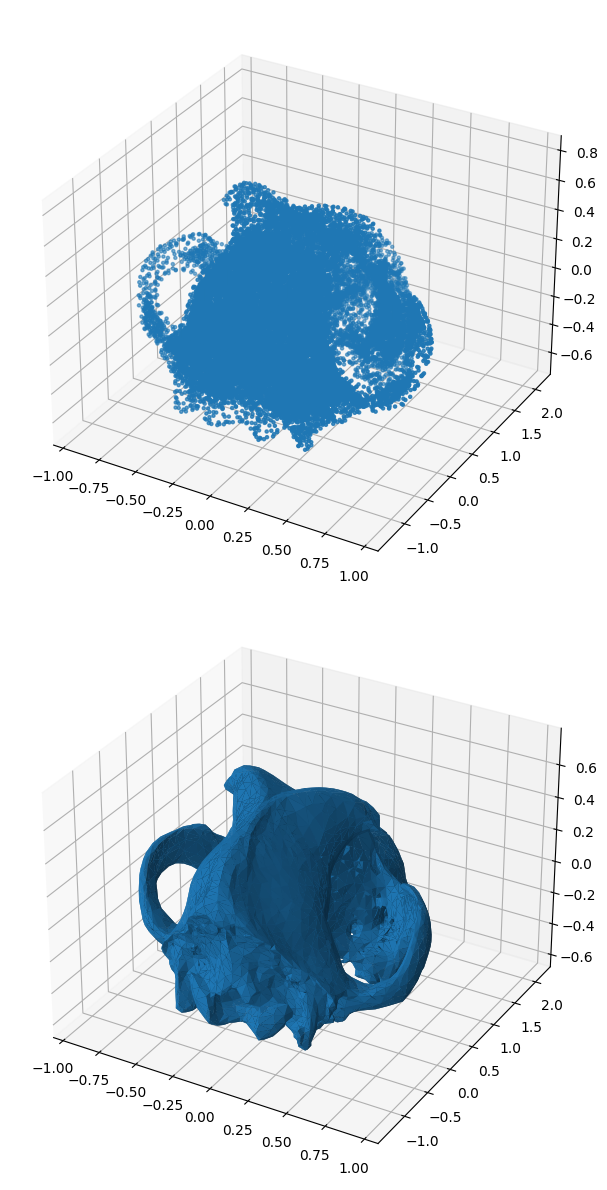

In [7]:
(x_mesh, y_mesh, z_mesh) = new_mesh_V[:,0], new_mesh_V[:,1], new_mesh_V[:,2]

# Take a look at your original mesh
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(x_mesh, y_mesh, z_mesh, s = 5)
#ax1.view_init(20, 30, 'z')

ax2 = fig.add_subplot(212, projection='3d')
ax2.plot_trisurf(x_mesh, y_mesh, triangles=new_mesh_F , Z=z_mesh)
#ax2.view_init(20, 30, 'z')

plt.tight_layout()
plt.show()

In [8]:
# Compute Q-Wiener process

n = 25
Q = np.eye(n)

shape_stochastics.compute_wiener_process_shape(x_mesh=x_mesh, y_mesh=y_mesh, z_mesh=z_mesh, faces=new_mesh_F, Q=Q, n = n, t=1.2, 
                                               n_step=30, make_gif=True, 
                                               file_dir = "tests/wiener_process_skull", file_name = "test.gif",
                                               x_view=-70, y_view=0, z_view=240)
         
    
#(x_view=0, y_view=0, z_view=0) for face
#(x_view=-70, y_view=0, z_view=120) for horse
#(x_view=-70, y_view=0, z_view=250) for labrador skull

array([[[ 0.24144763,  0.43712488, -0.39611983, ..., -0.02858667,
         -0.14610611, -0.37275212],
        [-0.80751027, -0.50819825, -0.42240266, ..., -1.17938784,
         -1.05537943,  0.63119975],
        [ 0.30181823,  0.00794864, -0.24093472, ...,  0.29072117,
          0.09850361, -0.26247069]],

       [[ 0.2577073 ,  0.44609337, -0.37980716, ..., -0.02360957,
         -0.14421561, -0.35796695],
        [-0.80405875, -0.5093539 , -0.42694844, ..., -1.16876545,
         -1.0446358 ,  0.62134552],
        [ 0.30071276,  0.01142314, -0.23529154, ...,  0.30368308,
          0.11489578, -0.27302557]],

       [[ 0.25639649,  0.44427177, -0.38147003, ..., -0.02433411,
         -0.14557578, -0.34509908],
        [-0.7906254 , -0.51340729, -0.4258872 , ..., -1.1577053 ,
         -1.03938526,  0.62501616],
        [ 0.30720077,  0.01073117, -0.2347767 , ...,  0.30829344,
          0.11606906, -0.26039319]],

       ...,

       [[ 0.27073814,  0.52480553, -0.34332541, ..., -0.0378118

## Diffusion process on mesh space

In [ ]:
n = 25 #choose a resolution for the sph decomposition (HAS TO BE A SQUARED NUMBER)
Q = np.eye(n)


### parameters for a Ornstein-Ulhenbeck diffusion process
h, mu, sig = 1, 0, 0.1
b = lambda t, x : - h*(mu - x)
sigma = lambda t, x : sig

In [ ]:
shape_stochastics.compute_diffusion_process_shape(x_mesh=x_mesh, y_mesh=y_mesh, z_mesh=z_mesh, faces=new_mesh_F, Q=Q, b=b, sigma=sigma,
                                               n = 25, t=1, n_step=20, make_gif=True, 
                                               file_dir = "tests/sde_process_bunny", file_name = "test.gif",
                                               x_view=-70, y_view=0, z_view=250)